In [1]:
try : 
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf


TensorFlow 2.x selected.


# 5.1 Binary Classification

   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.4              0.70          0.0  ...      9.4        5     0
1            7.8              0.88          0.0  ...      9.8        5     0

[2 rows x 13 columns]
   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.0              0.27         0.36  ...      8.8        6     1
1            6.3              0.30         0.34  ...      9.5        6     1

[2 rows x 13 columns]


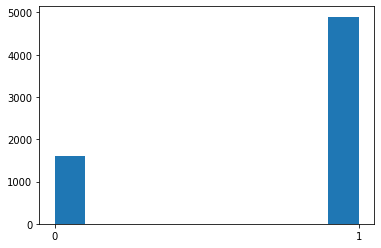

1    4898
0    1599
Name: type, dtype: int64


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep=';')

red['type'] = 0
white['type'] = 1
print(red.head(2))
print(white.head(2))

wine = pd.concat([red,white])

plt.hist(wine['type'])
plt.xticks([0,1])
plt.show()

print(wine['type'].value_counts())


정규화


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep=';')

red['type'] = 0
white['type'] = 1
print(red.head(2))
print(white.head(2))

wine = pd.concat([red,white])

wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
print(wine_norm.head())
print(wine_norm.describe())
#print(wine['type'].value_counts())

   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.4              0.70          0.0  ...      9.4        5     0
1            7.8              0.88          0.0  ...      9.8        5     0

[2 rows x 13 columns]
   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.0              0.27         0.36  ...      8.8        6     1
1            6.3              0.30         0.34  ...      9.5        6     1

[2 rows x 13 columns]
   fixed acidity  volatile acidity  citric acid  ...   alcohol   quality  type
0       0.297521          0.413333     0.000000  ...  0.202899  0.333333   0.0
1       0.330579          0.533333     0.000000  ...  0.260870  0.333333   0.0
2       0.330579          0.453333     0.024096  ...  0.260870  0.333333   0.0
3       0.611570          0.133333     0.337349  ...  0.260870  0.500000   0.0
4       0.297521          0.413333     0.000000  ...  0.202899  0.333333   0.0

[5 rows x 13 colu

train data와 test data 나누기

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep=';')

red['type'] = 0
white['type'] = 1
print(red.head(2))
print(white.head(2))

wine = pd.concat([red,white])

wine_norm = (wine - wine.min()) / (wine.max() - wine.min())

wine_shuffle = wine_norm.sample(frac =1)
#print(wine_shuffle.head())
wine_np = wine_shuffle.to_numpy()
#print(wine_np[:5])
train_idx = int(len(wine_np)*0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx,-1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:,-1]

train_Y = tf.keras.utils.to_categorical(train_Y,num_classes=2)
test_Y = tf.keras.utils.to_categorical(test_Y,num_classes=2)



   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.4              0.70          0.0  ...      9.4        5     0
1            7.8              0.88          0.0  ...      9.8        5     0

[2 rows x 13 columns]
   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.0              0.27         0.36  ...      8.8        6     1
1            6.3              0.30         0.34  ...      9.5        6     1

[2 rows x 13 columns]
      fixed acidity  volatile acidity  citric acid  ...   alcohol   quality  type
758        0.355372          0.526667     0.000000  ...  0.260870  0.333333   0.0
3097       0.231405          0.466667     0.301205  ...  0.536232  0.333333   1.0
2072       0.231405          0.100000     0.162651  ...  0.217391  0.333333   1.0
1308       0.487603          0.406667     0.192771  ...  0.304348  0.333333   0.0
4669       0.173554          0.240000     0.198795  ...  0.507246  0.333333   1.0


딥러닝

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep=';')

red['type'] = 0
white['type'] = 1
print(red.head(2))
print(white.head(2))

wine = pd.concat([red,white])

wine_norm = (wine - wine.min()) / (wine.max() - wine.min())

wine_shuffle = wine_norm.sample(frac =1)
#print(wine_shuffle.head())
wine_np = wine_shuffle.to_numpy()
#print(wine_np[:5])
train_idx = int(len(wine_np)*0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx,-1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:,-1]

train_Y = tf.keras.utils.to_categorical(train_Y,num_classes=2)
test_Y = tf.keras.utils.to_categorical(test_Y,num_classes=2)

model = tf.keras.Sequential([
      tf.keras.layers.Dense(units=48, activation='relu',input_shape=(12,)),
      tf.keras.layers.Dense(units=24, activation='relu'),
      tf.keras.layers.Dense(units=12, activation='relu'),
      tf.keras.layers.Dense(units=2, activation='softmax'),
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#model.summary()
train_Y = np.argmax(train_Y, axis=1)
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.4              0.70          0.0  ...      9.4        5     0
1            7.8              0.88          0.0  ...      9.8        5     0

[2 rows x 13 columns]
   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.0              0.27         0.36  ...      8.8        6     1
1            6.3              0.30         0.34  ...      9.5        6     1

[2 rows x 13 columns]
Train on 3897 samples, validate on 1300 samples
Epoch 1/25
3897/3897 [==============================] - 1s 212us/sample - loss: 0.1334 - accuracy: 0.9500 - val_loss: 0.0365 - val_accuracy: 0.9877
Epoch 2/25
3897/3897 [==============================] - 0s 69us/sample - loss: 0.0546 - accuracy: 0.9841 - val_loss: 0.0304 - val_accuracy: 0.9885
Epoch 3/25
3897/3897 [==============================] - 0s 68us/sample - loss: 0.0600 - accuracy: 0.9820 - val_loss: 0.0364 - val_accuracy: 0.9892
Ep

시각화

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt



red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep=';')

red['type'] = 0
white['type'] = 1
print(red.head(2))
print(white.head(2))

wine = pd.concat([red,white])

wine_norm = (wine - wine.min()) / (wine.max() - wine.min())

wine_shuffle = wine_norm.sample(frac =1)
#print(wine_shuffle.head())
wine_np = wine_shuffle.to_numpy()
#print(wine_np[:5])
train_idx = int(len(wine_np)*0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx,-1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:,-1]

train_Y = tf.keras.utils.to_categorical(train_Y,num_classes=2)
test_Y = tf.keras.utils.to_categorical(test_Y,num_classes=2)

model = tf.keras.Sequential([
      tf.keras.layers.Dense(units=48, activation='relu',input_shape=(12,)),
      tf.keras.layers.Dense(units=24, activation='relu'),
      tf.keras.layers.Dense(units=12, activation='relu'),
      tf.keras.layers.Dense(units=2, activation='softmax'),
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#model.summary()
train_Y = np.argmax(train_Y, axis=1)
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

#plt.figure(figsize=(12,4))

#plt.subplot(1,2,1)
#plt.plot(history.history['loss'],'b-',label='loss')
#plt.plot(hist)
test_Y = np.argmax(test_Y, axis=1)
model.evaluate(test_X,test_Y)

   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.4              0.70          0.0  ...      9.4        5     0
1            7.8              0.88          0.0  ...      9.8        5     0

[2 rows x 13 columns]
   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.0              0.27         0.36  ...      8.8        6     1
1            6.3              0.30         0.34  ...      9.5        6     1

[2 rows x 13 columns]
Train on 3897 samples, validate on 1300 samples
Epoch 1/25
3897/3897 [==============================] - 1s 166us/sample - loss: 0.1543 - accuracy: 0.9405 - val_loss: 0.0564 - val_accuracy: 0.9815
Epoch 2/25
3897/3897 [==============================] - 0s 73us/sample - loss: 0.0770 - accuracy: 0.9779 - val_loss: 0.0452 - val_accuracy: 0.9892
Epoch 3/25
3897/3897 [==============================] - 0s 73us/sample - loss: 0.0651 - accuracy: 0.9836 - val_loss: 0.0381 - val_accuracy: 0.9892
Ep

[0.04162054289060717, 0.9946154]

# 5.2 다항 분류

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  type  
0      9.4        5     0  
1      9.8        5     0  
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   
1                 14.0                 132.0    0.994  3.3       0.49   

   

C:\Users\A\anaconda3\envs\tensorflow2\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\A\anaconda3\envs\tensorflow2\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


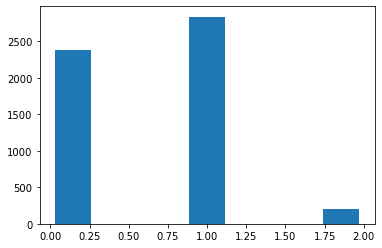

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep=';')

red['type'] = 0
white['type'] = 1
print(red.head(2))
print(white.head(2))

wine = pd.concat([red,white])
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] > 7, 'new_quality'] = 2
print(wine['quality'].describe())
print(wine['quality'].value_counts())
print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())
plt.hist(wine['new_quality'],bins=7,rwidth=0.8)
plt.show()

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep=';')

red['type'] = 0
white['type'] = 1
print(red.head(2))
print(white.head(2))

wine = pd.concat([red,white])
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2
print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())


del wine['quality']
wine_norm = (wine - wine.min())/(wine.max() - wine.min()) #정규화
wine_shuffle = wine_norm.sample(frac =1)
wine_np = wine_shuffle.to_numpy()


#전체 데이터의 80%를 훈련에, 나머지는 test 데이터로 이용할 수 있도록 분리
train_idx = int(len(wine_np) * 0.8) 
train_X , train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=3)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=3)

#학습 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48,activation='relu',input_shape=(12,)),
    tf.keras.layers.Dense(units=24,activation='relu'),
    tf.keras.layers.Dense(units =12,activation='relu'),
    tf.keras.layers.Dense(units =3,activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss = 'categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)




   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  type  
0      9.4        5     0  
1      9.8        5     0  
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   
1                 14.0                 132.0    0.994  3.3       0.49   

   